<a href="https://colab.research.google.com/github/Alf-caput/LAB04_Regresion_y_agrupamiento/blob/Jdev/Copia_de_LAB04_Regresion_y_agrupamientov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [1]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [2]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

# Ejercicio 1	(Regresión	lineal	simple)

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir
el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).
Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los
vinos que han sido producidos en los últimos años con el objetivo de construir un modelo y realizar las
siguientes acciones:


1.    Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar
aquellas variables candidatas para el proceso de regresión (0.5 puntos).
2.   Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones
que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el
atributo objetivo (nivel de alcohol) (1 punto). En necesario justificar la elección de los atributos
mediante la utilización de datos empíricos.
3. Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables
seleccionadas en el punto anterior (1 punto).
4. Calcular el error en el modelo obtenidos en el punto anterior (0.5 puntos).




# 1)

Leemos el archivo csv

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'wine_alcohol.csv'
df = pd.read_csv(filename, sep=';')

df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Nos fijamos que los valores de la columna index se corresponden con el índice de fila que nos genera pandas.   

In [4]:
len(df.index.unique()) == len(df['id'])

True

Por tanto, podemos usar esa columna como índice

In [5]:
df = df.set_index('id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Con el método info podemos ver los tipos de las variables:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


Todas parecen ser de tipo numérico, no obstante como veremos más adelante las variables **quality** y **wine type** toman valores numéricos discretos que realmente hacen referencia a categorías.

Podemos también comprobar la existencia de valores NA en el dataset:

In [7]:
print(f'Número total de NA en el dataframe: {(col_na:=df.isna().sum()).sum()}')
pd.DataFrame({'Valores NA': col_na})

Número total de NA en el dataframe: 0


,Valores NA
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No se encuentra ninguno, en caso contrario habría sido necesario tomar una decisión sobre eliminar esas observaciones o sustituir el valor NA por algún valor que sea coherente con los datos como por ejemplo la media.

Con el método describe podemos hacernos una idea de los rangos en los que se mueven las variables:

In [8]:
# Only check partial info and use .T for clearer appearance
significant_info = ['mean', 'std', 'min', 'max']
df.describe().T.loc[:, significant_info]

,mean,std,min,max
fixed acidity,7.215307,1.296434,3.80000,15.90000
volatile acidity,0.339666,0.164636,0.08000,1.58000
citric acid,0.318633,0.145318,0.00000,1.66000
residual sugar,5.443235,4.757804,0.60000,65.80000
chlorides,0.056034,0.035034,0.00900,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,440.00000
density,0.994697,0.002999,0.98711,1.03898
pH,3.218501,0.160787,2.72000,4.01000
sulphates,0.531268,0.148806,0.22000,2.00000


Finalmente con boxplots podemos comprobar a simple vista que existen outliers en distintas variables, más adelante tomamos decisiones sobre los mismos

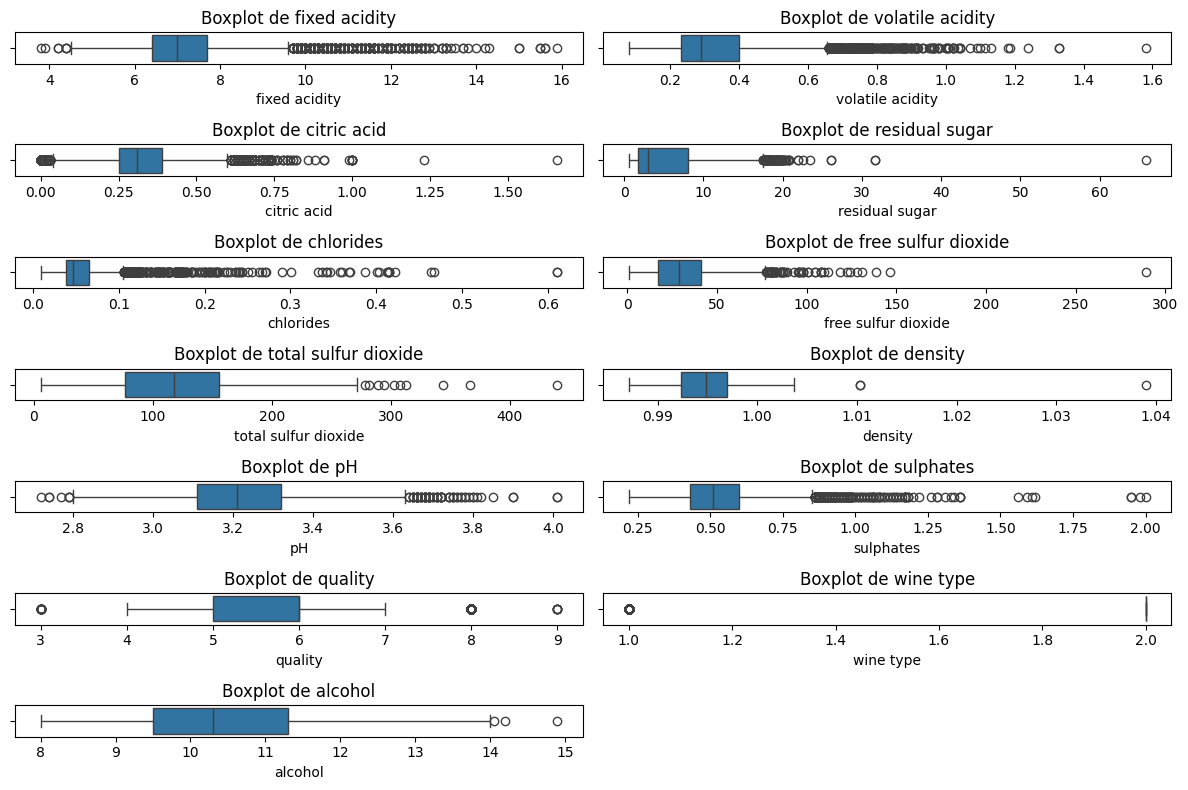

In [9]:
# Seleccionar las columnas numéricas para el análisis de outliers
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear gráficos de boxplot para cada característica numérica
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

El dataset cuenta con las siguientes variables:  

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- quality
- winetype
- alcohol

Sería de interés eliminar o sustituir (por otros coherentes) valores que no tengan sentido.

Como no somos expertos en el campo, vamos a estudiar un subconjunto de las variables para la limpieza del dataset, y posteriormente decidiremos la forma de eliminar outliers sobre el conjunto completo de variables.

Subconjunto sobre el que se hace limpieza:
- citric acid
- pH
- quality
- winetype
- alcohol

Aunque **fixed acidity** y **volatile acidity** son valores importantes no somos expertos y se definen a partir de la combinación de ácidos de distintos tipos, los excluimos del analisis inicial en limpieza y solo nos fijamos en **citric acid**.  

La variable **citric acid** nos indica la acidez que aporta el ácido cítrico, el cual es un ácido no volátil (en inglés non volatiles o **fixed acids**) que deberá estar correlacionado con los valores de la variable **fixed acid**.

##### Variable: **citric acid**

Investigando un poco podemos suponer que la variable **citric acid** se expresa concentración, la cual se suele expresar en g/L, algo lógico al estar la media en 0.3 que tiene sentido estando el rango habitual(*) entre 0 y 1 g/L.

(*Fuente: https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman.#:~:text=El%20%C3%A1cido%20c%C3%ADtrico%20est%C3%A1%20presente,1%2D1%20g%2Fl.)

In [10]:
df.describe().drop('count').T.loc[['citric acid'], :]

,mean,std,min,25%,50%,75%,max
citric acid,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66


No obstante, el máximo supera 1g/L lo cual no es posible al ser este el actual límite
jurídico europeo(*).  

(*Fuente: https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)

In [11]:
c_acid_ilegal = df.loc[:, 'citric acid'] > 1
print('Número de vinos ilegales:', c_acid_ilegal.sum())
df[c_acid_ilegal].head()

Número de vinos ilegales: 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,6,2,12.2
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,6,2,13.1


Se eliminan:

In [12]:
df = df[~c_acid_ilegal]
len(df)

6495

##### Variable: **pH**

En cuanto a la variable **pH** los valores normales oscilan entre 3 y 4 (*), nuestros valores mínimo y máximo son 2.72 y 4.01 el valor máximo no se aleja del rango pero si que ocurre con el mínimo.

(*Fuente: https://www.hannainst.es/blog/1513/pH-en-la-elaboracion-del-vino#:~:text=La%20mayor%C3%ADa%20de%20los%20vinos,m%C3%A1s%20comunes%20para%20los%20tintos.)

Tomamos la decisión de aquellos por debajo de 3 convertirlos a 3 y aquellos por encima de 4 (aunque solo 0.01) convertirlos a 4:

In [13]:
ph_lt_3 = df.loc[:, 'pH'] < 3
ph_gt_4 = df.loc[:, 'pH'] > 4

print('Número de vinos con pH < 3:', ph_lt_3.sum())
print('Número de vinos con pH > 4:', ph_gt_4.sum())

df.loc[ph_lt_3, 'pH'] = 3
df.loc[ph_gt_4, 'pH'] = 4

print('Conversión a rango [3, 4]')
df.describe().drop('count').T.loc[['pH'], :]

Número de vinos con pH < 3: 466
Número de vinos con pH > 4: 2
Conversión a rango [3, 4]


,mean,std,min,25%,50%,75%,max
pH,3.223012,0.153063,3.0,3.11,3.21,3.32,4.0


Se ha tomado esta decisión en vez de eliminar o sustituir por una medida de centralización como la media, por ser simple y no estar los valores excesivamente alejados (tan solo 0.3 unidades como mucho del rango)

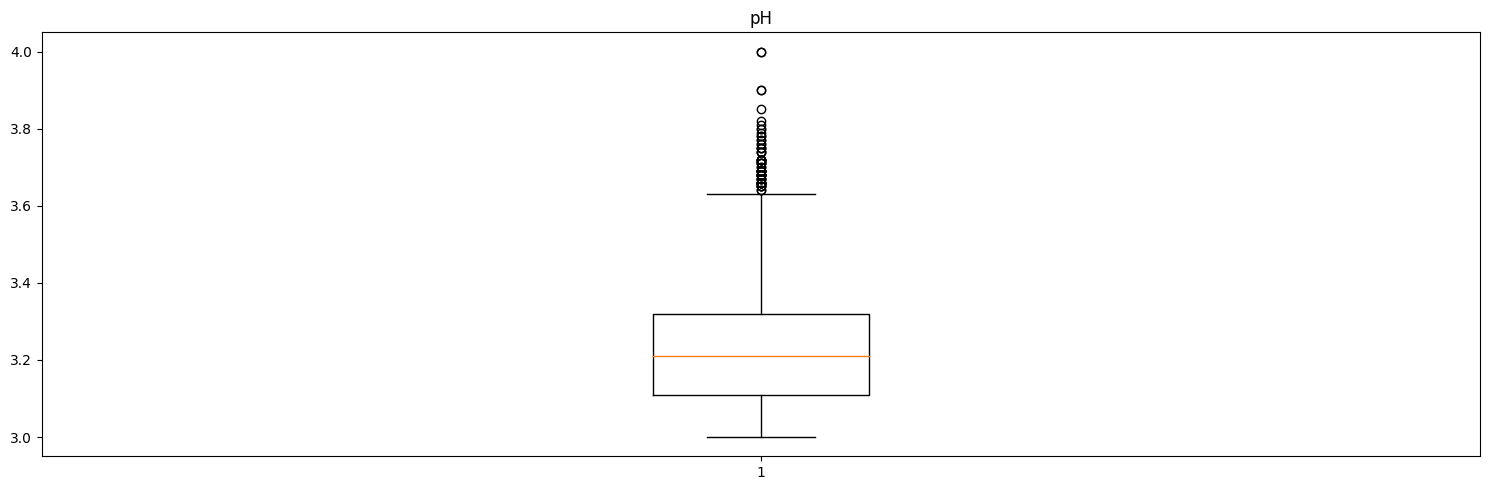

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['pH'])
axs.set_title('pH')

plt.tight_layout()

plt.show()

Aunque sigan existiendo outliers que se alejan de la muestra ahora se ha pasado a un rango más adecuado y estos tienen sentido.

##### Variable: **quality**

Existen 7 tipos de calidades registradas:

In [15]:
possible_qualities = df['quality'].unique()
possible_qualities

array([5, 6, 7, 4, 8, 3, 9])

Podemos ver su distribución mediante un diagram de barras:

<BarContainer object of 7 artists>

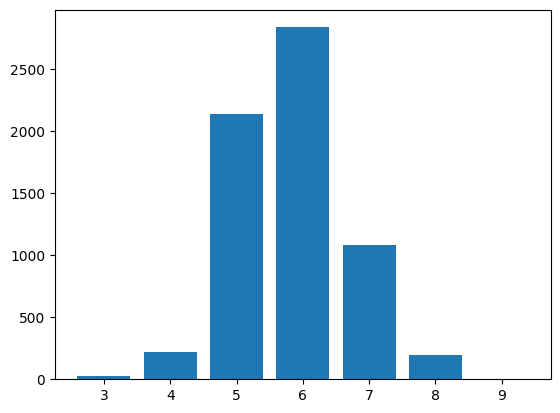

In [16]:
quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

<BarContainer object of 3 artists>

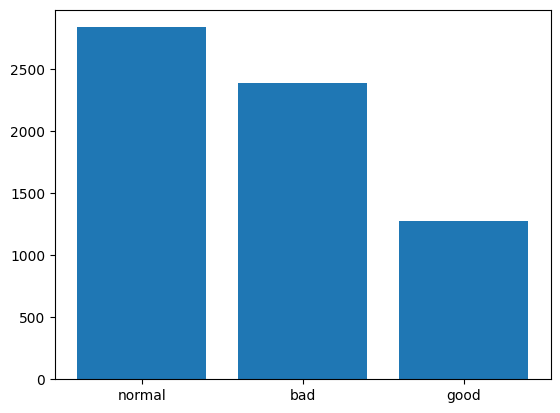

In [17]:
var = 'quality'

bad = df.loc[:, var] <= 5
normal = df.loc[:, var] == 6
good = df.loc[:, var] > 6

df.loc[bad, var] = 'bad'
df.loc[normal, var] = 'normal'
df.loc[good, var] = 'good'

quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Comprobamos que ha tenido éxito la transformación

In [18]:
df.loc[:, ['quality']].head()

,quality
id,
0,bad
1,bad
2,bad
3,normal
4,bad


##### Variable: **winetype**

La variable **wine type** no sabemos como se ha estimado, pero es sencilla, solo toma dos valores:

In [19]:
df['wine type'].unique()

array([1, 2])

Se trata de un tipo de vino, esto es, una variable categórica binaria.

Existen más vinos que pertenecen al tipo 2 que al tipo 1:

In [20]:
winetype_freq = df['wine type'].value_counts()
winetype_freq

wine type
2    4896
1    1599
Name: count, dtype: int64

Con un diagrama de barras se observa mejor:

<BarContainer object of 2 artists>

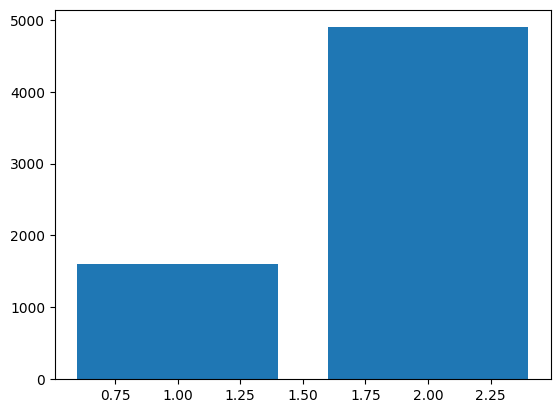

In [21]:
plt.bar(winetype_freq.index, winetype_freq.values)

No tenemos opciones sencillas para igualar la representación.

##### Variable: **alcohol**

El alcohol en el vino se expresa en tanto por ciento y ronda entre 5.5% y 25%. Lo cual es coherente con los valores del dataset (suponemos que utilizan esta métrica).

In [22]:
df.describe().drop('count').T.loc[['alcohol'], :]

,mean,std,min,25%,50%,75%,max
alcohol,10.491136,1.192268,8.0,9.5,10.3,11.3,14.9


Con un boxplot nos hacemos idea de la cantidad de outliers y como se distribuyen los valores de la variable:

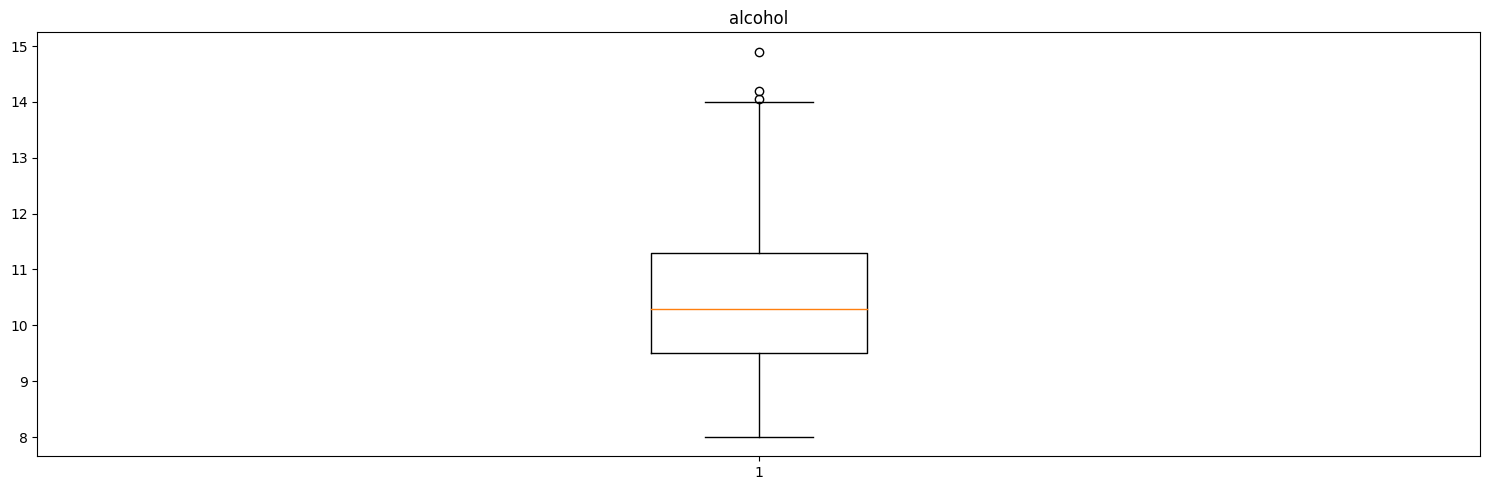

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['alcohol'])
axs.set_title('alcohol')

plt.tight_layout()

plt.show()

Como ya hemos mencionado es conveniente trabajar con las variables **quality** y **wine type** como variables categóricas.

La librería pandas dispone de un tipo categórico llamado **"category"** pero para el tipo de algoritmo no interesa convertir a **"object"**.

In [24]:
categorical_vars = ['quality', 'wine type']
df[categorical_vars] = df[categorical_vars].astype('object')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bad,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,bad,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,bad,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,normal,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,bad,1,9.4


### TODO: Outliers

Finalmente una vez se han estudiado este subconjunto de variables, se realiza una eliminación de outliers utilizando el rango intercuartílico (IQR).

Se define una función para obtener un pandas dataframe con los límites a partir de los que categorizamos como outlier utilizando IQR:

In [25]:
import pandas as pd

def get_outlier_bounds(df:pd.DataFrame, selected_cols:list):
    selected_df = df[selected_cols]

    # Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
    Q1 = selected_df.quantile(0.25)
    Q3 = selected_df.quantile(0.75)

    IQR = Q3 - Q1
    outliers_range = 1.5 * IQR

    lower_bound = Q1 - outliers_range
    upper_bound = Q3 + outliers_range

    outlier_bounds = pd.DataFrame({'lower_bound': lower_bound, 'upper_bound': upper_bound})

    return outlier_bounds


get_outlier_bounds(df, ['pH']).head()

,lower_bound,upper_bound
pH,2.795,3.635


Para saber cuando quitar outliers lo que haremos será ver si escasean (bajo un cierto umbral) en cuyo caso eliminaremos.

In [26]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)
df_bounds = get_outlier_bounds(df_non_categorical, df_non_categorical.columns)
df_bounds

,lower_bound,upper_bound
fixed acidity,4.450000,9.650000
volatile acidity,-0.025000,0.655000
citric acid,0.040000,0.600000
residual sugar,-7.650000,17.550000
chlorides,-0.002500,0.105500
free sulfur dioxide,-19.000000,77.000000
total sulfur dioxide,-41.500000,274.500000
density,0.985365,1.003965
pH,2.795000,3.635000
sulphates,0.175000,0.855000


In [27]:
outliers_count = {}

for columna in df_bounds.index:
    lower_bound = df_bounds.loc[columna, 'Lower Bound']
    upper_bound = df_bounds.loc[columna, 'Upper Bound']
    outliers_count[columna] = ((df[columna] < lower_bound) | (df[columna] > upper_bound)).sum()

outliers_count

KeyError: 'Lower Bound'

De manera arbitraria vamos a elegir eliminar los outliers de una variable de manera aditiva hasta reducir en un 5% el tamaño del dataset:

### TODO: Eliminar variables fijándonos en correlación

Para ver la relación entre las variables obtenemos la matriz de correlación (omitimos variables categóricas)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6495 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6495 non-null   float64
 1   volatile acidity      6495 non-null   float64
 2   citric acid           6495 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6495 non-null   float64
 6   total sulfur dioxide  6495 non-null   float64
 7   density               6495 non-null   float64
 8   pH                    6495 non-null   float64
 9   sulphates             6495 non-null   float64
 10  quality               6495 non-null   object 
 11  wine type             6495 non-null   object 
 12  alcohol               6495 non-null   float64
dtypes: float64(11), object(2)
memory usage: 710.4+ KB


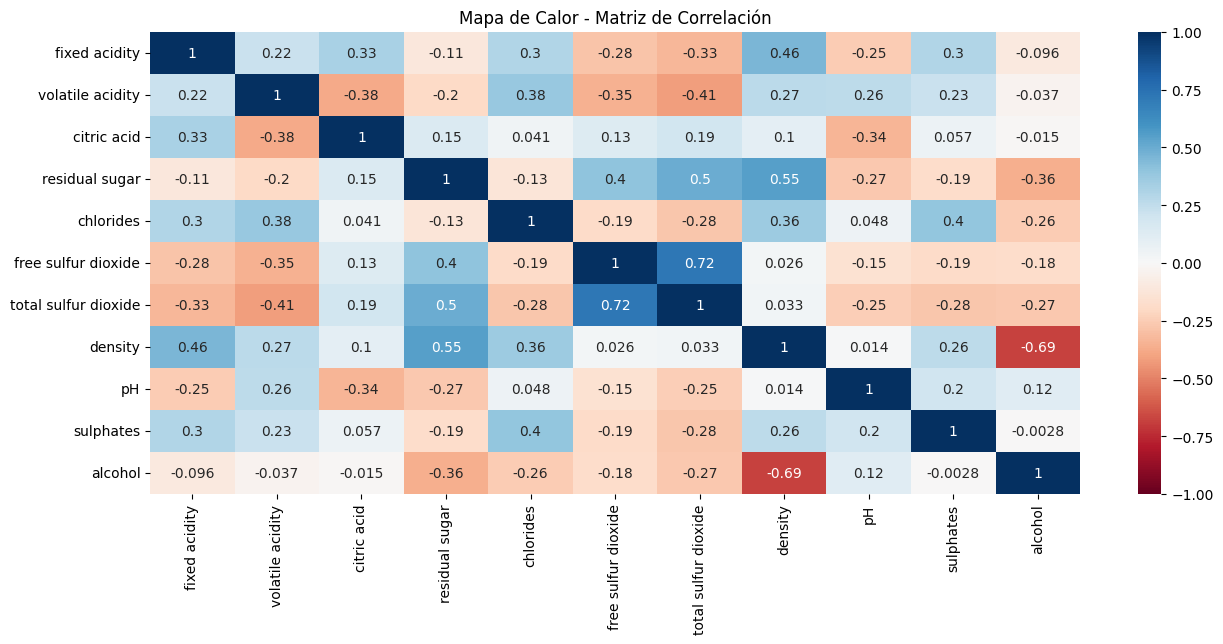

In [29]:
import seaborn as sns

categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
sns.heatmap(df_non_categorical.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Tomando las variables "fixed cidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density" "pH", "sulphates" alcohol".
Al hacer la matriz de correlación, obtenemos los siguientes coeficientes:
alcohol: -0.096, -0.037, -0.015, -0.36, -0.26, -0.18, -0.27, -0.69, 0.12, -0.0028, 1;

Pasamos ahora a estandarizar los datos, para ello nos servimos de la clase **StandardScaler** de **scikit-learn**, esta nos permite llevar los datos a un rango [-1, 1] con media 0 y desviación típica 1.

Aplicamos esta transformación sobre los datos que hemos estimado como no categóricos:

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_vars = df.select_dtypes(exclude='object').columns
df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.875119,0.192989,bad,1,-0.915248
1,0.451038,3.281772,-2.211415,-0.597708,1.197669,-0.311097,-0.862519,0.701168,-0.150352,0.999376,bad,1,-0.579727
2,0.451038,2.552893,-1.933500,-0.660760,1.026400,-0.874513,-1.092677,0.767876,0.241674,0.797779,bad,1,-0.579727
3,3.073437,-0.362626,1.679397,-0.744829,0.541141,-0.761830,-0.986450,1.101416,-0.411703,0.327387,normal,1,-0.579727
4,0.142520,2.188453,-2.211415,-0.744829,0.569685,-1.099879,-1.446766,1.034708,1.875119,0.192989,bad,1,-0.915248


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Paso 2: Preparar los datos
# Asegurarnos de que 'density' y 'alcohol' no tienen valores nulos
df = df_non_categorical.dropna(subset=['density', 'alcohol'])

# Definir las variables independiente (X) y dependiente (y)
X = df[['density']]  # La variable independiente debe ser un DataFrame
y = df['alcohol']    # La variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 4: Predecir y evaluar el modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Imprimir el coeficiente de determinación R^2
print(f"Coeficiente de determinación R^2: {r2:.2f}")


Coeficiente de determinación R^2: 0.50


Coeficiente de intercepto (b0): 277.2276
Coeficiente de pendiente (b1) para 'density': -268.1645
Coeficiente de determinación R^2: 0.4960
Error cuadrático medio (MSE): 0.7582
Raíz del error cuadrático medio (RMSE): 0.8707


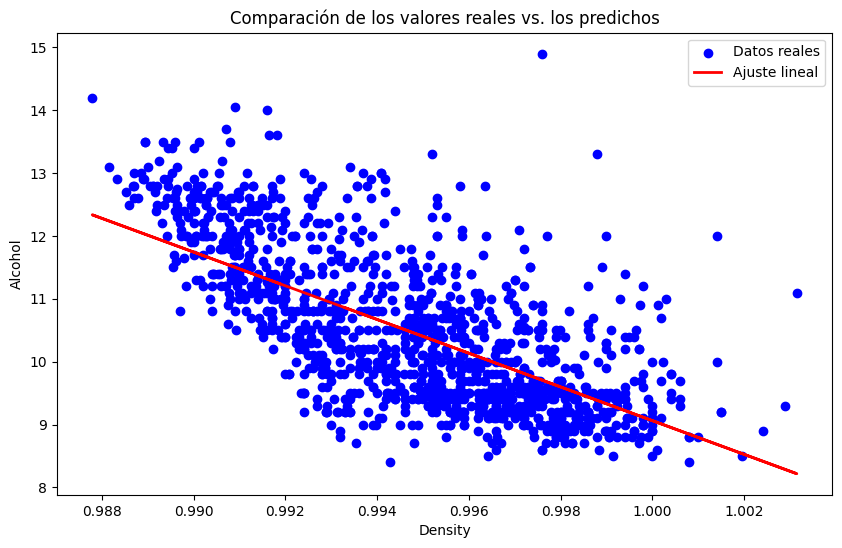

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt



# Asegurarse de que 'density' y 'alcohol' no tienen valores nulos
data = df.dropna(subset=['density', 'alcohol'])

# Definir las variables independiente (X) y dependiente (y)
X = data[['density']]
y = data['alcohol']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir resultados del modelo
print(f"Coeficiente de intercepto (b0): {model.intercept_:.4f}")
print(f"Coeficiente de pendiente (b1) para 'density': {model.coef_[0]:.4f}")
print(f"Coeficiente de determinación R^2: {r2:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")

# Gráfico de dispersión de los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Ajuste lineal')
plt.title('Comparación de los valores reales vs. los predichos')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae:.4f}")

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()
